In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
print("First 5 Records:\n", df.head())
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

First 5 Records:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Shape: (200, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ K

The dataset contains records of 200 customers in a mall having 5 attributes: 
CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)
Fron df.info and df.head we conclude *only Grade feature is categorical* (text) and rest is numeric.
- **CustomerID**: Unique ID of customer
- **Genre**: Gender of customer
- **Age**: Age of customer
- **Age Annual Income (k$)**: Annual income of customer represented in *x* 1000 dollars
- **Spending Score (1-100)**: Spending Score of customer



In [5]:
df.columns = ["CustomerID", "Gender", "Age", "Annual_Income", "Spending_Score"]

In [6]:
print("\nNumerical Summary:")
print(df.describe())


Numerical Summary:
       CustomerID         Age  Annual_Income  Spending_Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000


In [7]:
numerical_cols = ["Age", "Annual_Income", "Spending_Score"]
central_tendency = pd.DataFrame({
    "Mean": df[numerical_cols].mean(),
    "Median": df[numerical_cols].median(),
    "Mode": df[numerical_cols].mode().iloc[0]
})
print("\nCentral Tendency:\n", central_tendency)


Central Tendency:
                  Mean  Median  Mode
Age             38.85    36.0  32.0
Annual_Income   60.56    61.5  54.0
Spending_Score  50.20    50.0  42.0


In [8]:
dispersion = pd.DataFrame({
    "Range": df[numerical_cols].max() - df[numerical_cols].min(),
    "Variance": df[numerical_cols].var(),
    "Std Deviation": df[numerical_cols].std(),
    "IQR": df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
})

print("\nDispersion Measures:\n", dispersion)


Dispersion Measures:
                 Range    Variance  Std Deviation    IQR
Age                52  195.133166      13.969007  20.25
Annual_Income     122  689.835578      26.264721  36.50
Spending_Score     98  666.854271      25.823522  38.25


In [9]:
print("\nSkewness:")
print(df[numerical_cols].skew())


Skewness:
Age               0.485569
Annual_Income     0.321843
Spending_Score   -0.047220
dtype: float64


In [10]:
gender_freq = df["Gender"].value_counts()
gender_percent = df["Gender"].value_counts(normalize=True) * 100

print("\nGender Frequency:\n", gender_freq)
print("\nGender Percentage Distribution:\n", gender_percent)


Gender Frequency:
 Gender
Female    112
Male       88
Name: count, dtype: int64

Gender Percentage Distribution:
 Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


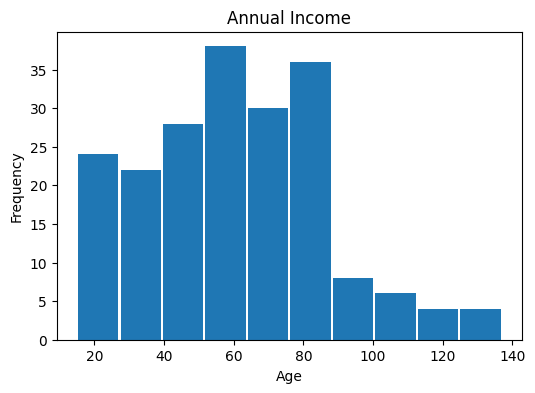

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df["Annual_Income"], rwidth=0.95)
plt.title("Annual Income")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

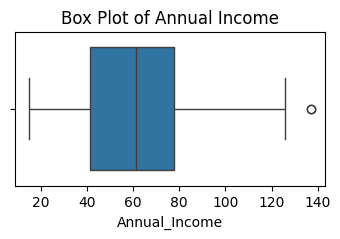

In [22]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df["Annual_Income"])
plt.title("Box Plot of Annual Income")
plt.show()

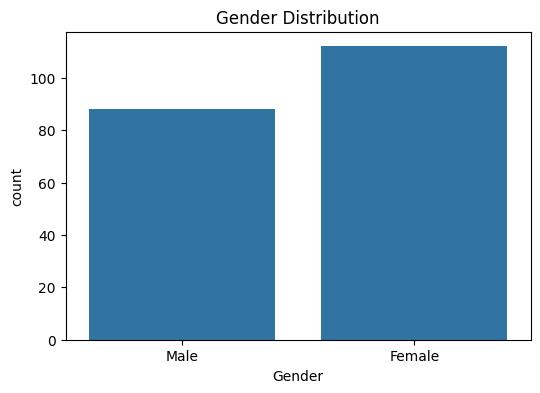

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

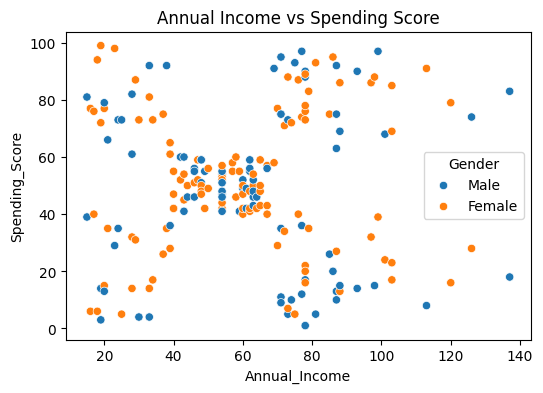

In [114]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual_Income", y="Spending_Score", hue="Gender", data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

In [15]:
print("\nKey Observations:")
print("- Average customer age:", round(df["Age"].mean(), 2))
print("- Average annual income:", round(df["Annual_Income"].mean(), 2))
print("- Average spending score:", round(df["Spending_Score"].mean(), 2))
print("- Majority gender:", df["Gender"].mode()[0])
print("- Income & spending show visible customer segmentation")


Key Observations:
- Average customer age: 38.85
- Average annual income: 60.56
- Average spending score: 50.2
- Majority gender: Female
- Income & spending show visible customer segmentation
